In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [29]:
df=pd.read_csv('Iris.csv')

In [30]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df=df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
# Data preprocessing

from sklearn.preprocessing import LabelEncoder

In [33]:
en=LabelEncoder()

In [34]:
df['Species']=en.fit_transform(df['Species'])

In [35]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,6.7,3.1,4.7,1.5,1
84,5.4,3.0,4.5,1.5,1
87,6.3,2.3,4.4,1.3,1
120,6.9,3.2,5.7,2.3,2
4,5.0,3.6,1.4,0.2,0
119,6.0,2.2,5.0,1.5,2
138,6.0,3.0,4.8,1.8,2
47,4.6,3.2,1.4,0.2,0
116,6.5,3.0,5.5,1.8,2
35,5.0,3.2,1.2,0.2,0


In [36]:
df=df[df['Species']!=0][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [37]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [38]:
df=df.sample(100)
df_train=df.iloc[:60, :].sample(10)
df_val=df.iloc[60:80, :].sample(5)
df_test=df.iloc[80:, :].sample(5)

In [39]:
df_train


,SepalWidthCm,PetalLengthCm,Species
79,2.6,3.5,1
68,2.2,4.5,1
112,3.0,5.5,2
127,3.0,4.9,2
57,2.4,3.3,1
66,3.0,4.5,1
113,2.5,5.0,2
128,2.8,5.6,2
123,2.7,4.9,2
148,3.4,5.4,2


In [40]:
df_val

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
62,2.2,4.0,1
135,3.0,6.1,2
63,2.9,4.7,1
94,2.7,4.2,1


In [41]:

X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

## Bagging

In [43]:
#Data for tree 1

df_bag=df_train.sample(8, replace=True)

X=df_bag.iloc[:, 0:2]
y=df_bag.iloc[:, -1]

In [44]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
128,2.8,5.6,2
66,3.0,4.5,1
128,2.8,5.6,2
79,2.6,3.5,1
123,2.7,4.9,2
123,2.7,4.9,2
112,3.0,5.5,2


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [46]:

dt_bag1 = DecisionTreeClassifier()

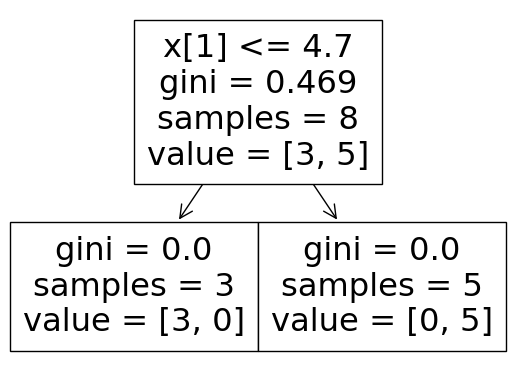

1.0


C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


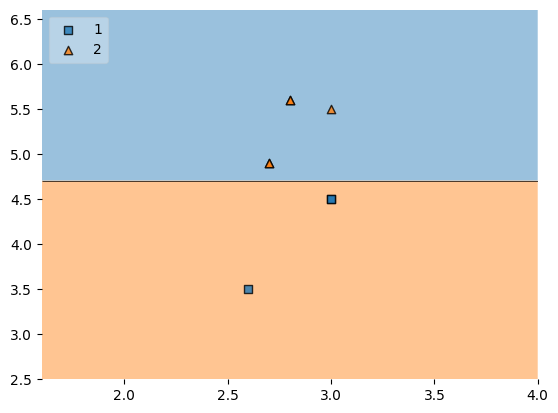

In [47]:

evaluate(dt_bag1,X,y)

In [48]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
79,2.6,3.5,1
123,2.7,4.9,2
57,2.4,3.3,1
128,2.8,5.6,2
128,2.8,5.6,2
68,2.2,4.5,1
66,3.0,4.5,1


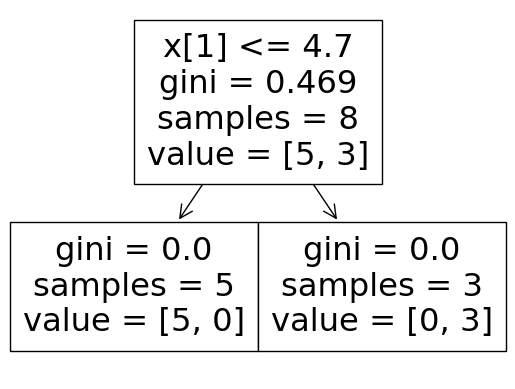

1.0


C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


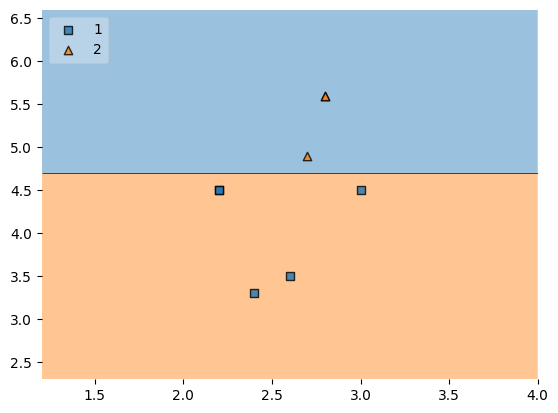

In [49]:

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
113,2.5,5.0,2
127,3.0,4.9,2
127,3.0,4.9,2
127,3.0,4.9,2
128,2.8,5.6,2
112,3.0,5.5,2
113,2.5,5.0,2


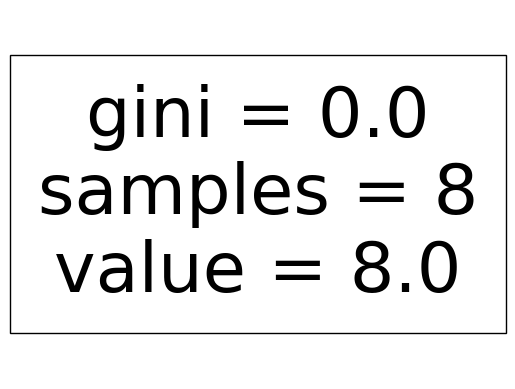

0.2


C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


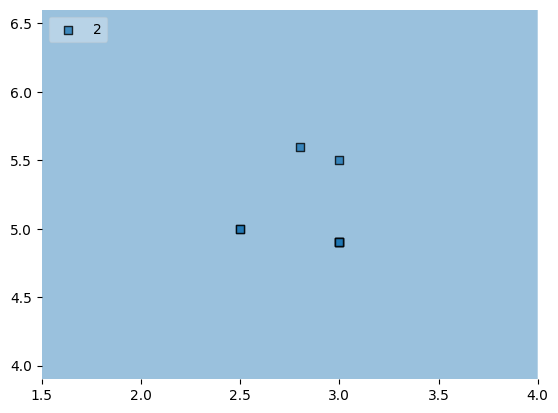

In [51]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [52]:
## Predict

In [53]:
df_test


,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
126,2.8,4.8,2
98,2.5,3.0,1
108,2.5,5.8,2
96,2.9,4.2,1


In [55]:

print("Predictor 1",dt_bag1.predict(np.array([2.5, 3.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.5, 3.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.5, 3.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
